In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_test = pd.read_csv('D:\LP6\Embedding-ML-Model-into-a-Web-App\dataset\Paitients_Files_Test.csv')
df_train = pd.read_csv('D:\LP6\Embedding-ML-Model-into-a-Web-App\dataset\Paitients_Files_Train.csv')


In [3]:
df_test.shape, df_train.shape


((169, 10), (599, 11))

In [4]:
df_train

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1    ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2    ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3    ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4    ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 11 columns]

In [5]:
df_test

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0    ICU200609    1  109  38  18  120  23.1  0.407   26          1
1    ICU200610    1  108  88  19    0  27.1  0.400   24          1
2    ICU200611    6   96   0   0    0  23.7  0.190   28          1
3    ICU200612    1  124  74  36    0  27.8  0.100   30          1
4    ICU200613    7  150  78  29  126  35.2  0.692   54          0
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...
164  ICU200773   10  101  76  48  180  32.9  0.171   63          1
165  ICU200774    2  122  70  27    0  36.8  0.340   27          1
166  ICU200775    5  121  72  23  112  26.2  0.245   30          1
167  ICU200776    1  126  60   0    0  30.1  0.349   47          1
168  ICU200777    1   93  70  31    0  30.4  0.315   23          1

[169 rows x 10 columns]

In [6]:
df_train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [7]:
df_test.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


Null hypothesis: Older people have the tendency of developing sepsis
Alternate hypothesis: Younger people have higher tendency of developing sepsis

Questions
1. How many patients have the tendency of developing sepsis
2. Which age group are more prone to developing sepsis
3. Does having an insurance enhance patients chances of getting sepsis
4. Which blood parameters are associated with sepsis
5. Is body mass directly correlated with a patients tendency to get sepsis

In [10]:
Profile_train = pp.ProfileReport(df_train)
Profile_train

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# How many patients have the tendency of developing sepsis?
208 patient have the tendency of developing sepsis

In [12]:
sep  = df_train.groupby('Sepssis', as_index=False)['ID'].count()


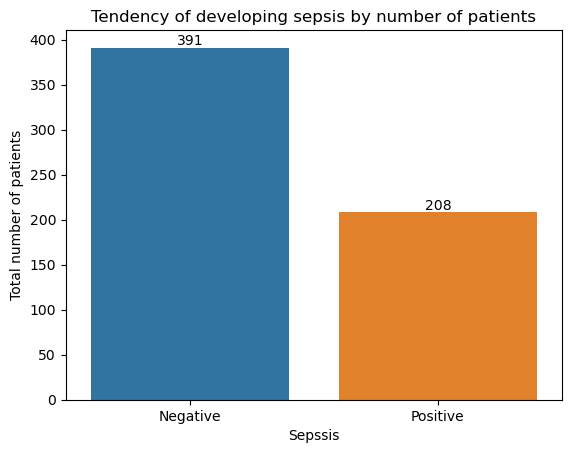

In [15]:
splot = sns.barplot(data=sep, x='Sepssis', y='ID')
plt.xlabel("Sepssis")
plt.ylabel("Total number of patients")
plt.title('Tendency of developing sepsis by number of patients')
plt.bar_label(splot.containers[0], size=10)
plt.show()

# Which age group are more prone to developing sepsis?
People between 20-30 years have higher tendency of getting sepsis.
Our Null hypothesis is therefore False and the alternate hypothesis proven true

In [30]:
#age group count of patients with sepsis

age_group = df_train[df_train.Sepssis == 'Positive'].groupby('Age', as_index=False)['ID'].count()
age_group

Age  ID
0    21   5
1    22   6
2    23   6
3    24   6
4    25  12
5    26   6
6    27   5
7    28  10
8    29  13
9    30   5
10   31  10
11   32   8
12   33   9
13   34   1
14   35   5
15   36   7
16   37   5
17   38   8
18   39   3
19   40   2
20   41  13
21   42   4
22   43   7
23   44   4
24   45   5
25   46   6
26   47   3
27   49   2
28   50   1
29   51   5
30   52   4
31   53   3
32   54   3
33   55   1
34   56   2
35   57   1
36   58   3
37   59   2
38   60   2
39   61   1
40   62   2
41   66   1
42   67   1

Text(0.5, 1.0, 'Age group of patients with sepsis')

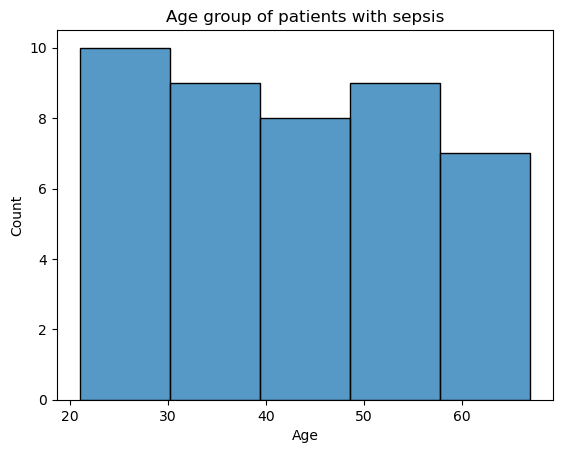

In [34]:
sns.histplot(data=age_group, x="Age", bins=5)
plt.title('Age group of patients with sepsis')

# Does having an insurance enhance patients chances of getting sepsis?
No, majority of patients with insurance have no tendency of developing sepsis

Text(0.5, 1.0, 'Insurance of all patients')

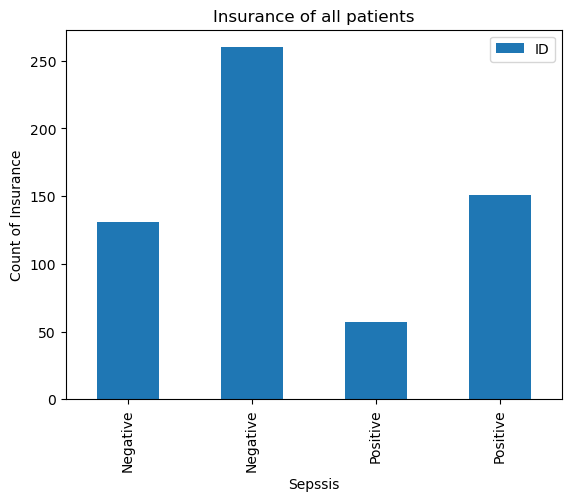

In [48]:
insured = df_train.groupby(['Sepssis', 'Insurance'], as_index=False)['ID'].count()
insured.plot(kind='bar', x='Sepssis', y='ID')
plt.ylabel('Count of Insurance')
plt.title('Insurance of all patients')

# Is body mass directly correlated with a patients tendency to get sepsis?
Per the histogram used to visualize the data, majority of sepsis patient are between a body mass of 30-40. However, there are even a greater number of people with the same body mass without sepsis hence it cannot be concluded that the tendency of a patient getting sepsis is correlated with their body weight. 

In [49]:
body_mass = df_train.groupby(['Sepssis', 'M11'], as_index=False)['ID'].count()

In [81]:
hist1 = body_mass[body_mass.Sepssis == 'Positive']
hist2 = body_mass[body_mass.Sepssis == 'Negative']

Text(0.5, 1.0, 'Body mass of patient with Sepsis')

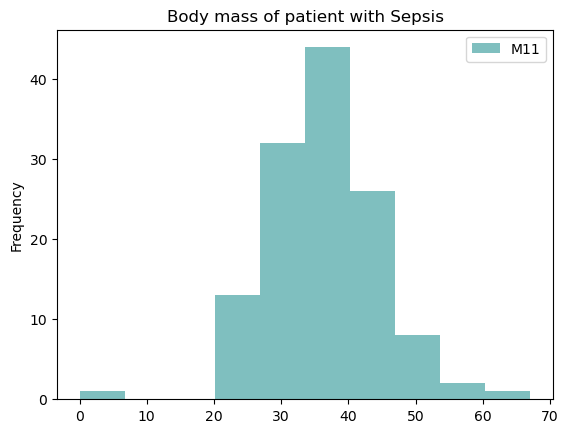

In [79]:
hist1.plot(kind='hist', column = 'M11', bins = 10, color = 'teal', \
           alpha = 0.5 )
plt.title('Body mass of patient with Sepsis')


Text(0.5, 1.0, 'Body mass of patient without Sepsis')

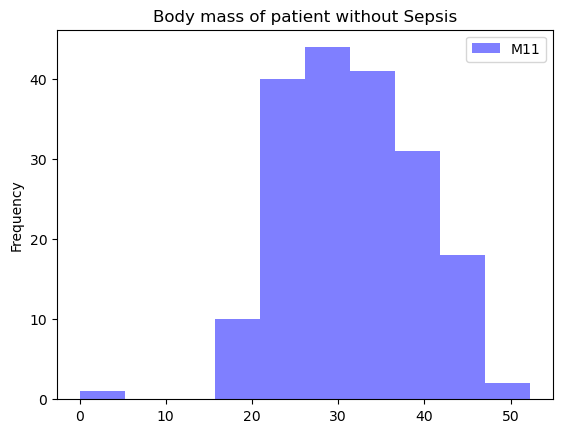

In [80]:
hist2.plot(kind='hist', column = 'M11', bins = 10, color = 'blue', \
            alpha = 0.5)
plt.title('Body mass of patient without Sepsis')

# Which blood parameters are associated with sepsis